In [1]:

# -*- coding: utf-8 -*-

# Qiskit Experiments

# By Farnaz Nouraei


from qiskit import *
from qiskit import QuantumCircuit
from qiskit import execute, IBMQ, BasicAer, Aer
from qiskit.providers.ibmq import least_busy
from qiskit.tools.visualization import *
import inspect
from qiskit.converters import circuit_to_dag
from qiskit.transpiler import PassManager
from qiskit.transpiler.coupling import CouplingMap
from qiskit.transpiler.my_pass_manager import my_pass_manager
from qiskit.transpiler.layout import Layout
from qiskit.visualization import pass_manager_visualization
from qiskit.transpiler.preset_passmanagers import level_0_pass_manager
from qiskit.transpiler.transpile_config import TranspileConfig


IBMQ.save_account('d8b73c934840b9ece3a5e4bd24e38d5278c72b7f1c24d46fed0f4721f30927d90644be3232eb2ac71f4f66090e6d2496dabde3807250bc5be84355a87fc9b089');

# Create a Quantum Circuit
qr = QuantumRegister(5, 'q')
cr = ClassicalRegister(5, 'c')
qc = QuantumCircuit(qr, cr)

# Add a H gate on qubit 0, putting this qubit in superposition.
qc.h(0)
# Add CX (CNOT) gates 
qc.cx(0,1)
qc.cx(0,2)
qc.cx(0,3)
qc.cx(0,4)
# Add a Measure gate to see the state.
qc.measure([0,1,2,3,4], [0,1,2,3,4])
#THE TWO VECs SHOW QUANTUM AND CLASSICAL REGs

print('Circuit Depth = ',qc.depth())


#show the circuit
qc.draw(output = 'mpl', interactive = True)


Credentials already present. Set overwrite=True to overwrite.


Circuit Depth =  6


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


<Figure size 1053.5x535.111 with 1 Axes>

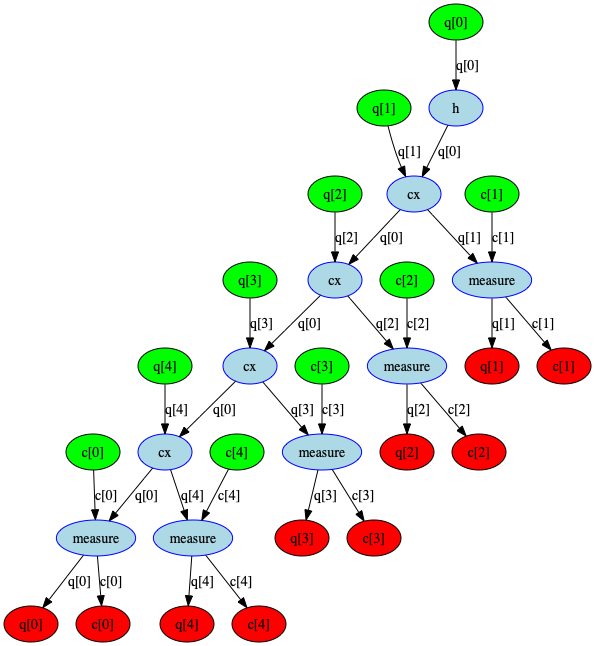

In [2]:
dag = circuit_to_dag(qc)
dag_drawer(dag)

Circuit Depth =  6 , Decomposed Circuit Depth =  6


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


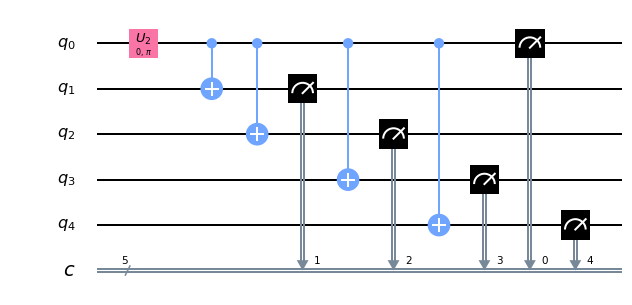

In [3]:
qc_basis = qc.decompose()
print('Circuit Depth = ',qc.depth(), ', Decomposed Circuit Depth = ', qc_basis.depth())
qc_basis.draw(output = 'mpl', interactive = True)

BasicAer backends:  [<QasmSimulatorPy('qasm_simulator') from BasicAer()>, <StatevectorSimulatorPy('statevector_simulator') from BasicAer()>, <UnitarySimulatorPy('unitary_simulator') from BasicAer()>]
{'11111': 512, '00000': 512}
Remote backends:  [<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='m

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/qiskit/providers/models/backendconfiguration.py:337: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


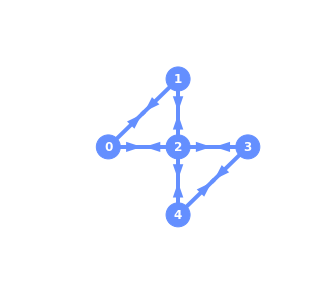

In [4]:
#To run the program on a simulator:

# See a list of available local simulators
print("BasicAer backends: ", BasicAer.backends())
backend_sim = BasicAer.get_backend('qasm_simulator')

# Compile and run the Quantum circuit on a simulator backend
job_sim = execute(qc, backend_sim)
result_sim = job_sim.result()

# Show the results
print(result_sim.get_counts(qc))






# Authenticate for access to remote backends
try:
    provider = IBMQ.load_account()
except:
    print("""WARNING: No valid IBMQ credentials found on disk.
             You must store your credentials using IBMQ.save_account(token, url).
             For now, there's only access to local simulator backends...""")
    exit(0)

# see a list of available remote backends

ibmq_backends = provider.backends()
print("Remote backends: ", ibmq_backends)


# Get a real device backend, and plot its coupling map

my_provider = IBMQ.get_provider()
list_of_backends = ['ibmqx2', 'ibmq_16_melbourne','ibmq_armonk','ibmq_burlington','ibmq_essex','ibmq_london']
backend  = my_provider.get_backend(list_of_backends[0])
coupling_list = getattr(backend.configuration(), 'coupling_map', None)
print('Coupling List: ',coupling_list)
plot_gate_map(backend, plot_directed=True)




Depth of transpiled circuit with preset pass manager with optimization level 0:  9


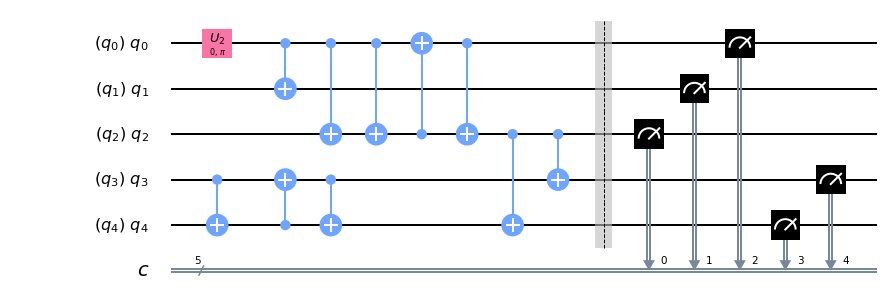

In [5]:
#Try preset pass manager, with optimization level 0:

new_circ_lv0 = transpile(qc, backend=backend,optimization_level=0)
print('Depth of transpiled circuit with preset pass manager with optimization level 0: ',new_circ_lv0.depth())
new_circ_lv0.draw(output = 'mpl', interactive = True)

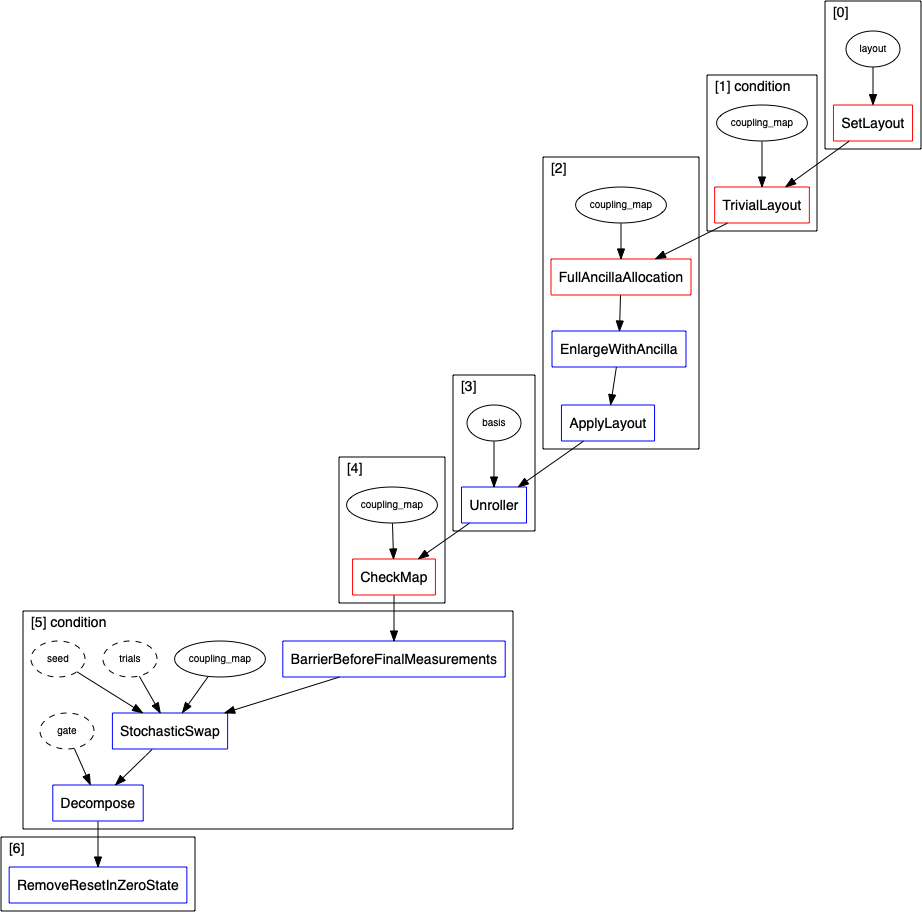

In [6]:
# Visulaize the preset pass manager's flow:

from qiskit.compiler.transpile import _parse_transpile_args

transpile_config = _parse_transpile_args(circuits=[qc], backend=backend,basis_gates=None, coupling_map=None, backend_properties=None,initial_layout=None, seed_transpiler=None, optimization_level=0,pass_manager=None, callback=None, output_name=None)[0]

pass_manager_drawer(level_0_pass_manager(transpile_config),filename='level0')

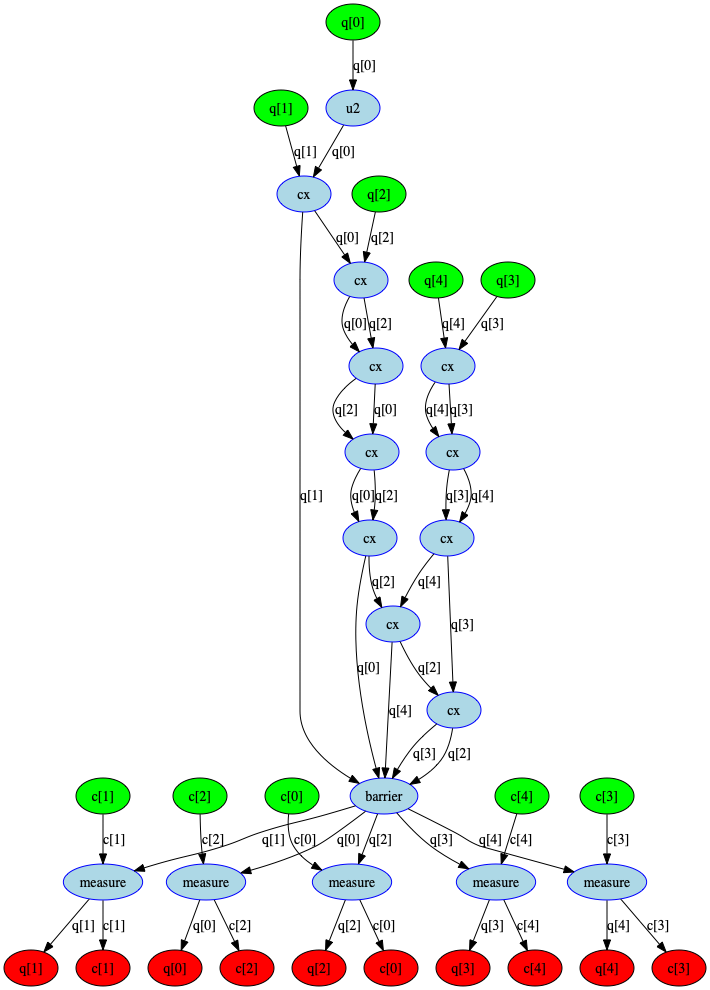

In [12]:
#Visualize the DAG of the transpiled circuit

dag = circuit_to_dag(new_circ_lv0)
dag_drawer(dag)

transpiled circuit with opt lv 0:  9


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


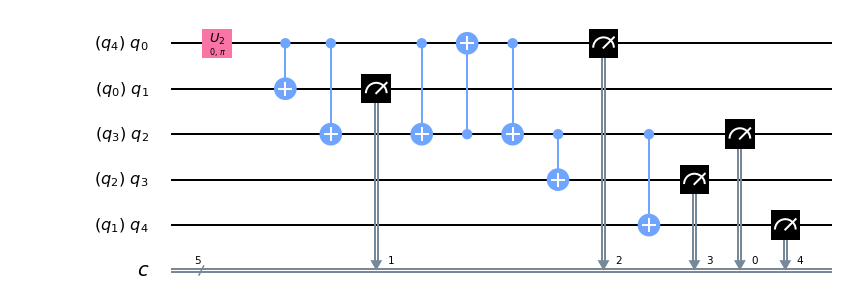

In [7]:
# Try customized pass manager:

coupling_map = CouplingMap(coupling_list)
initial_layout = Layout({qr[4]: 0, qr[0]: 1, qr[3]: 2, qr[2]: 3, qr[1]: 4})
qc_transpiled = transpile(qc, backend=backend,pass_manager = my_pass_manager(coupling_map,initial_layout))
print('transpiled circuit with opt lv 0: ',qc_transpiled.depth())
qc_transpiled.draw(output = 'mpl', interactive = True)

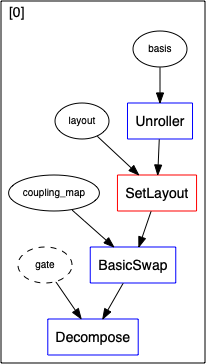

In [9]:
# Visualize the flow of customized pass manager

pass_manager_drawer(pass_manager = my_pass_manager(coupling_map,initial_layout),filename='my_passes')

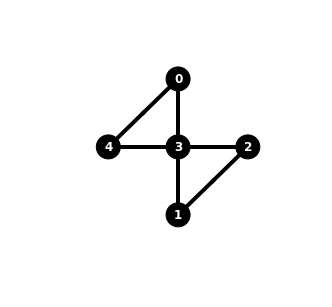

In [11]:
#visualize the initial mapping of virtual qubits to the coupling graph:

plot_circuit_layout(qc_transpiled, backend, view = 'virtual')

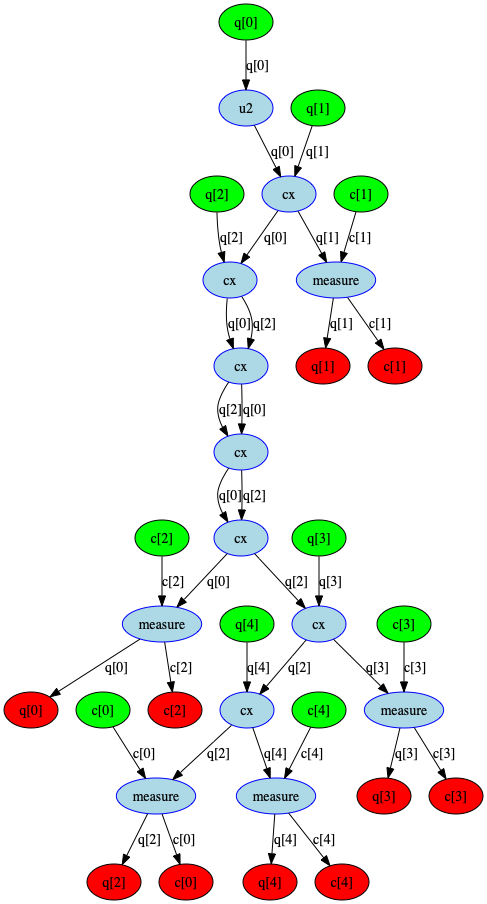

In [13]:
#Visualize the DAG of the transpiled circuit

dag = circuit_to_dag(qc_transpiled)
dag_drawer(dag)

Depth of transpiled circuit with preset pass manager with optimization level 3:  7


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


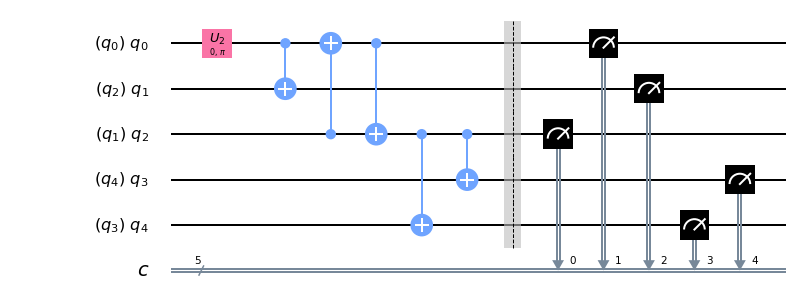

In [20]:
#Try Level 3 preset pass manager:

new_circ_lv3 = transpile(qc, backend=backend, optimization_level=3)
print('Depth of transpiled circuit with preset pass manager with optimization level 3: ',new_circ_lv3.depth())
new_circ_lv3.draw(output = 'mpl', interactive = True)

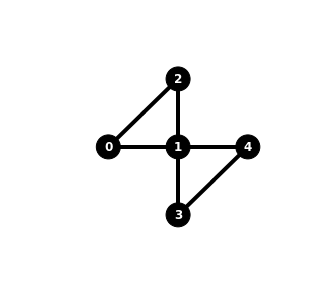

In [21]:
#initial mapping for level 3 preset pass manager:

plot_circuit_layout(new_circ_lv3, backend, view = 'virtual')

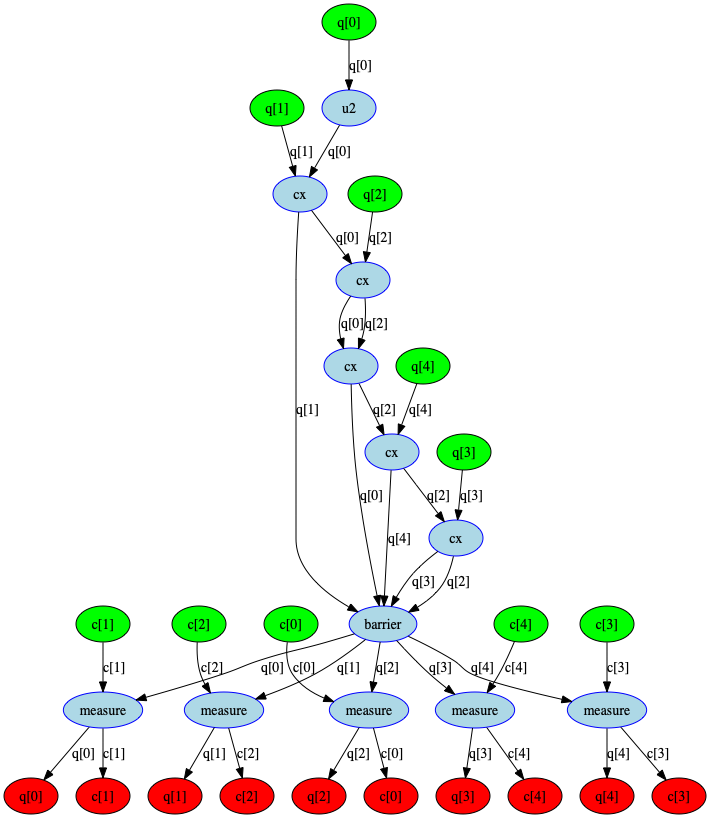

In [22]:
# Visualize the DAG for transpile circuit with level 3 preset pass manager:

dag = circuit_to_dag(new_circ_lv3)
dag_drawer(dag)

Counts:  {'01100': 1, '10101': 4, '10110': 3, '00001': 1, '01011': 2, '00100': 15, '11110': 5, '11001': 5, '10010': 1, '10111': 41, '00111': 4, '11101': 24, '01010': 2, '01111': 25, '10001': 3, '00000': 379, '01101': 1, '11011': 21, '10100': 4, '01000': 31, '11111': 413, '00011': 2, '11010': 3, '00101': 1, '00010': 14, '11000': 1, '00110': 7, '10011': 3, '01110': 6, '10000': 2}


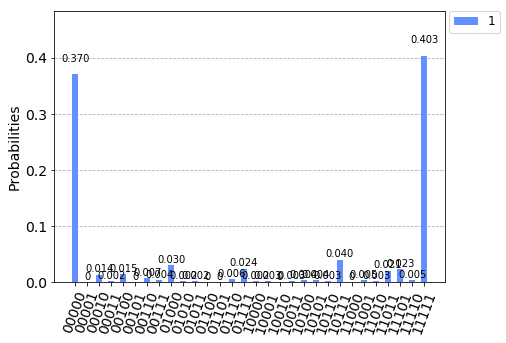

In [24]:
#backend = IBMQ.get_backend('')

#running the job
job_exp = execute(qc_transpiled, backend, shots=1024, max_credits=10) #we can feed already-transpiled circuit, in which case the preset transpilations in execute() are overridden
result_exp = job_exp.result()

# Show the results
print('Counts: ', result_exp.get_counts(qc));
plot_histogram(result_exp.get_counts(),legend=['1'])